In [2]:
import numpy as np
import pandas as pd
import glob
from pprint import pprint
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARIMA
%matplotlib inline




pd.set_option('display.max_columns',None)

#Import Data
path = r'/homes/chh30/ECS784-PROJECT/sourcedata'
filenames = glob.glob(path+"/*.csv")

frame = pd.DataFrame

list = []

for file_ in filenames:
     df = pd.read_csv(file_,index_col=None,encoding = "ISO-8859-1",header=0)
     list.append(df)

frame = pd.concat(list,ignore_index=True,sort=False)

frame.head()
print(frame.shape)

(10216388, 15)


In [3]:
#Clean Data


##Drop records with null value
frame.dropna(axis=0, subset=["Rental Id",
                             "Bike Id",
                             "Start Date",
                             "StartStation Id",
                             "StartStation Name",
                             "End Date",
                             "EndStation Id",
                             "EndStation Name",
                             "Duration"], inplace=True)


## Extra drop for duplicates
frame.drop_duplicates(inplace=True)



##Formatting column
frame["Bike Id"] = frame["Bike Id"].astype(int)
frame["Rental Id"] = frame["Rental Id"].astype(int)
frame["EndStation Id"] = frame["EndStation Id"].astype(int)
frame["StartStation Id"] = frame["StartStation Id"].astype(int)
frame["EndStation Id"] = frame["EndStation Id"].astype(int)
frame["Duration"] = frame["Duration"].astype(int)

frame = frame[frame["StartStation Id"] != frame["EndStation Id"]]

frame.tail(10)


,Rental Id,Duration,Bike Id,End Date,EndStation Id,EndStation Name,Start Date,StartStation Id,StartStation Name,Unnamed: 9,Unnamed: 10,Unnamed: 11,EndStation Logical Terminal,endStationPriority_id,StartStation Logical Terminal
10216377,53959330,1380,14020,18/05/2016 00:19,320,"Queen Mother Sports Centre, Victoria",17/05/2016 23:56,407,"Speakers' Corner 1, Hyde Park",NaN,NaN,NaN,NaN,NaN,NaN
10216378,53959329,480,1559,18/05/2016 00:04,544,"Percival Street, Finsbury",17/05/2016 23:56,331,"Bunhill Row, Moorgate",NaN,NaN,NaN,NaN,NaN,NaN
10216379,53959326,480,5496,18/05/2016 00:04,364,"Alfred Place, Bloomsbury",17/05/2016 23:56,4,"St. Chad's Street, King's Cross",NaN,NaN,NaN,NaN,NaN,NaN
10216380,53959333,360,3076,18/05/2016 00:03,317,"Dickens Square, Borough",17/05/2016 23:57,815,"Lambeth Palace Road, Waterloo",NaN,NaN,NaN,NaN,NaN,NaN
10216381,53959337,480,10291,18/05/2016 00:05,744,"Ingrave Street, Clapham Junction",17/05/2016 23:57,670,"Ashley Crescent, Battersea",NaN,NaN,NaN,NaN,NaN,NaN
10216382,53959334,1380,7802,18/05/2016 00:20,520,"Bancroft Road, Bethnal Green",17/05/2016 23:57,486,"Granby Street, Shoreditch",NaN,NaN,NaN,NaN,NaN,NaN
10216383,53959335,300,7029,18/05/2016 00:02,202,"Leman Street, Aldgate",17/05/2016 23:57,206,"New Road 1 , Whitechapel",NaN,NaN,NaN,NaN,NaN,NaN
10216384,53959332,300,1392,18/05/2016 00:02,202,"Leman Street, Aldgate",17/05/2016 23:57,206,"New Road 1 , Whitechapel",NaN,NaN,NaN,NaN,NaN,NaN
10216385,53959336,420,12896,18/05/2016 00:04,210,"Hinde Street, Marylebone",17/05/2016 23:57,188,"Nutford Place, Marylebone",NaN,NaN,NaN,NaN,NaN,NaN
10216387,53959338,420,10765,18/05/2016 00:06,626,"Normand Park, West Kensington",17/05/2016 23:59,666,"Olympia Way, Olympia",NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# Missing data checking

missing_data = frame.isnull()

for column in missing_data.columns.values.tolist():
    print(column)
    print(missing_data[column].value_counts())
    print("")

Start Date
False    9533099
Name: Start Date, dtype: int64

StartStation Id
False    9533099
Name: StartStation Id, dtype: int64

StartStation Name
False    9533099
Name: StartStation Name, dtype: int64

End Date
False    9533099
Name: End Date, dtype: int64

EndStation Id
False    9533099
Name: EndStation Id, dtype: int64

EndStation Name
False    9533099
Name: EndStation Name, dtype: int64

Duration
False    9533099
Name: Duration, dtype: int64



In [6]:
##Grab the column we need
frame = frame.loc[:,('Start Date',
                           'StartStation Id',
                           'StartStation Name',
                           'End Date',
                           'EndStation Id',
                           'EndStation Name',
                           'Duration')]

frame.tail(10)

,Start Date,StartStation Id,StartStation Name,End Date,EndStation Id,EndStation Name,Duration
10216377,17/05/2016 23:56,407,"Speakers' Corner 1, Hyde Park",18/05/2016 00:19,320,"Queen Mother Sports Centre, Victoria",1380
10216378,17/05/2016 23:56,331,"Bunhill Row, Moorgate",18/05/2016 00:04,544,"Percival Street, Finsbury",480
10216379,17/05/2016 23:56,4,"St. Chad's Street, King's Cross",18/05/2016 00:04,364,"Alfred Place, Bloomsbury",480
10216380,17/05/2016 23:57,815,"Lambeth Palace Road, Waterloo",18/05/2016 00:03,317,"Dickens Square, Borough",360
10216381,17/05/2016 23:57,670,"Ashley Crescent, Battersea",18/05/2016 00:05,744,"Ingrave Street, Clapham Junction",480
10216382,17/05/2016 23:57,486,"Granby Street, Shoreditch",18/05/2016 00:20,520,"Bancroft Road, Bethnal Green",1380
10216383,17/05/2016 23:57,206,"New Road 1 , Whitechapel",18/05/2016 00:02,202,"Leman Street, Aldgate",300
10216384,17/05/2016 23:57,206,"New Road 1 , Whitechapel",18/05/2016 00:02,202,"Leman Street, Aldgate",300
10216385,17/05/2016 23:57,188,"Nutford Place, Marylebone",18/05/2016 00:04,210,"Hinde Street, Marylebone",420
10216387,17/05/2016 23:59,666,"Olympia Way, Olympia",18/05/2016 00:06,626,"Normand Park, West Kensington",420


In [7]:
journeyCnt = frame.groupby(['StartStation Name','StartStation Id','EndStation Name','EndStation Id']).size().reset_index(name='Rental_Counts').nlargest(5,columns='Rental_Counts').tail(5)
journeyCnt

,StartStation Name,StartStation Id,EndStation Name,EndStation Id,Rental_Counts
37020,"Black Lion Gate, Kensington Gardens",307,"Palace Gate, Kensington Gardens",404,4497
175072,"Hyde Park Corner, Hyde Park",191,"Triangle Car Park, Hyde Park",248,4223
36902,"Black Lion Gate, Kensington Gardens",307,"Hyde Park Corner, Hyde Park",191,4192
174481,"Hyde Park Corner, Hyde Park",191,"Albert Gate, Hyde Park",303,4006
243230,"Palace Gate, Kensington Gardens",404,"Black Lion Gate, Kensington Gardens",307,3911


In [20]:
journeyData = frame[(frame['StartStation Id']==307)&(frame['EndStation Id']==404)]
journeyData['Start Date'] = pd.to_datetime(journeyData['Start Date'],format='%d/%m/%Y %H:%M',dayfirst=True)
journeyData['End Date'] = pd.to_datetime(journeyData['End Date'],format='%d/%m/%Y %H:%M',dayfirst=True)

begin = pd.Timestamp('2016-01-01 00:00:00')
end = pd.Timestamp('2016-12-31 23:59:59')
mask=(journeyData['Start Date'] >= begin)&(journeyData['Start Date'] <= end)
journeyData.loc[mask]

journeyData.info()
journeyData.tail(10)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4497 entries, 1601 to 10212584
Data columns (total 7 columns):
Start Date           4497 non-null datetime64[ns]
StartStation Id      4497 non-null int64
StartStation Name    4497 non-null object
End Date             4497 non-null datetime64[ns]
EndStation Id        4497 non-null int64
EndStation Name      4497 non-null object
Duration             4497 non-null int64
dtypes: datetime64[ns](2), int64(3), object(2)
memory usage: 281.1+ KB


/import/linux/python/3.6.6/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/import/linux/python/3.6.6/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Start Date,StartStation Id,StartStation Name,End Date,EndStation Id,EndStation Name,Duration
10197702,2016-05-17 14:25:00,307,"Black Lion Gate, Kensington Gardens",2016-05-17 14:32:00,404,"Palace Gate, Kensington Gardens",420
10197703,2016-05-17 14:25:00,307,"Black Lion Gate, Kensington Gardens",2016-05-17 14:32:00,404,"Palace Gate, Kensington Gardens",420
10198536,2016-05-17 15:02:00,307,"Black Lion Gate, Kensington Gardens",2016-05-17 15:07:00,404,"Palace Gate, Kensington Gardens",300
10199050,2016-05-17 15:22:00,307,"Black Lion Gate, Kensington Gardens",2016-05-17 16:10:00,404,"Palace Gate, Kensington Gardens",2880
10199749,2016-05-17 15:47:00,307,"Black Lion Gate, Kensington Gardens",2016-05-17 16:07:00,404,"Palace Gate, Kensington Gardens",1200
10199750,2016-05-17 15:47:00,307,"Black Lion Gate, Kensington Gardens",2016-05-17 16:07:00,404,"Palace Gate, Kensington Gardens",1200
10207037,2016-05-17 18:06:00,307,"Black Lion Gate, Kensington Gardens",2016-05-17 18:10:00,404,"Palace Gate, Kensington Gardens",240
10209777,2016-05-17 18:44:00,307,"Black Lion Gate, Kensington Gardens",2016-05-17 18:48:00,404,"Palace Gate, Kensington Gardens",240
10212557,2016-05-17 19:45:00,307,"Black Lion Gate, Kensington Gardens",2016-05-17 19:49:00,404,"Palace Gate, Kensington Gardens",240
10212584,2016-05-17 19:46:00,307,"Black Lion Gate, Kensington Gardens",2016-05-17 20:13:00,404,"Palace Gate, Kensington Gardens",1620


In [37]:
#From 7am to 21pm
journeyData['YearMonthHour'] = journeyData['Start Date'].map(lambda x: 100*x.year+x.month)
journeyData['Year'] = journeyData['Start Date'].map(lambda x:x.year)
journeyData['Month'] = journeyData['Start Date'].map(lambda x: x.month)
journeyData['Hour'] = journeyData['Start Date'].map(lambda x: x.hour)

hourmask=(journeyData['Hour']>=7)&(journeyData['Hour']<=21)
journeyData = journeyData.loc[hourmask]

#2016 Only
begin = pd.Timestamp('2016-01-01 00:00:00')
end = pd.Timestamp('2016-12-31 23:59:59')
mask=(journeyData['Start Date'] >= begin)&(journeyData['Start Date'] <= end)
journeyData = journeyData.loc[mask]

journeyData.tail(10)

,Start Date,StartStation Id,StartStation Name,End Date,EndStation Id,EndStation Name,Duration,YearMonth,Year,Month,Hour,YearMonthHour
10197702,2016-05-17 14:25:00,307,"Black Lion Gate, Kensington Gardens",2016-05-17 14:32:00,404,"Palace Gate, Kensington Gardens",420,201605,2016,5,14,201605
10197703,2016-05-17 14:25:00,307,"Black Lion Gate, Kensington Gardens",2016-05-17 14:32:00,404,"Palace Gate, Kensington Gardens",420,201605,2016,5,14,201605
10198536,2016-05-17 15:02:00,307,"Black Lion Gate, Kensington Gardens",2016-05-17 15:07:00,404,"Palace Gate, Kensington Gardens",300,201605,2016,5,15,201605
10199050,2016-05-17 15:22:00,307,"Black Lion Gate, Kensington Gardens",2016-05-17 16:10:00,404,"Palace Gate, Kensington Gardens",2880,201605,2016,5,15,201605
10199749,2016-05-17 15:47:00,307,"Black Lion Gate, Kensington Gardens",2016-05-17 16:07:00,404,"Palace Gate, Kensington Gardens",1200,201605,2016,5,15,201605
10199750,2016-05-17 15:47:00,307,"Black Lion Gate, Kensington Gardens",2016-05-17 16:07:00,404,"Palace Gate, Kensington Gardens",1200,201605,2016,5,15,201605
10207037,2016-05-17 18:06:00,307,"Black Lion Gate, Kensington Gardens",2016-05-17 18:10:00,404,"Palace Gate, Kensington Gardens",240,201605,2016,5,18,201605
10209777,2016-05-17 18:44:00,307,"Black Lion Gate, Kensington Gardens",2016-05-17 18:48:00,404,"Palace Gate, Kensington Gardens",240,201605,2016,5,18,201605
10212557,2016-05-17 19:45:00,307,"Black Lion Gate, Kensington Gardens",2016-05-17 19:49:00,404,"Palace Gate, Kensington Gardens",240,201605,2016,5,19,201605
10212584,2016-05-17 19:46:00,307,"Black Lion Gate, Kensington Gardens",2016-05-17 20:13:00,404,"Palace Gate, Kensington Gardens",1620,201605,2016,5,19,201605


In [130]:
#Generate YYYY-MM-DD HH:00
df1 = journeyData.loc[:,(  'Start Date',
                           'YearMonth',
                           'Year',
                           'Month',
                           'Hour',
                           'Duration')]
df1.tail(10)




,Start Date,YearMonth,Year,Month,Hour,Duration
10197702,2016-05-17 14:25:00,201605,2016,5,14,420
10197703,2016-05-17 14:25:00,201605,2016,5,14,420
10198536,2016-05-17 15:02:00,201605,2016,5,15,300
10199050,2016-05-17 15:22:00,201605,2016,5,15,2880
10199749,2016-05-17 15:47:00,201605,2016,5,15,1200
10199750,2016-05-17 15:47:00,201605,2016,5,15,1200
10207037,2016-05-17 18:06:00,201605,2016,5,18,240
10209777,2016-05-17 18:44:00,201605,2016,5,18,240
10212557,2016-05-17 19:45:00,201605,2016,5,19,240
10212584,2016-05-17 19:46:00,201605,2016,5,19,1620


In [138]:
dfRentalCnt = df1.groupby(['Year','Month','Hour']).size().reset_index(name='HourlyCount')
dfRentalCnt['HourlyCount'] = dfRentalCnt['HourlyCount']/100
#dfRentalCnt['HourOfMonth'] = dfRentalCnt['Year'].astype(str)+'-'+dfRentalCnt['Month'].astype(str)+' '+dfRentalCnt['Hour'].astype(str)+'h'
#dfRentalCnt = dfRentalCnt.loc[:,('HourOfMonth','HourlyCount

for i in range(12):
    x = i+1
    dfCSV = dfRentalCnt.loc[dfRentalCnt['Month']==x,('Hour','HourlyCount')]
    Path = r'/homes/chh30/ECS784-PROJECT/Export_Data/WeekdayRental'+str(x)+'.csv'
    dfCSV.to_csv(Path,index=False)
    print(x)

1
2
3
4
5
6
7
8
9
10
11
12


In [143]:
import calendar 
dfDuration = df1
dfDuration['monthrange'] = (dfDuration['Start Date'].map(lambda x: cl.monthrange(x.year,x.month)[1]))
dfDuration['Duration'] = dfDuration['Duration']/dfDuration['monthrange']
dfDuration = dfDuration.groupby(['Year','Month','Hour'])['Duration'].agg(['sum'])
dfDuration

sum
Year Month Hour            
2016 1     7       2.934443
           8       7.055151
           9       4.370447
           10     17.606660
           11     12.799168
           12     29.968783
           13     27.284079
           14     23.787721
           15     29.469303
           16     16.420395
           17      3.683663
           20      0.312175
     2     7       4.708680
           8      14.054697
           9      16.837099
           10     17.193817
           11     22.187872
           12     22.829964
           13     27.895363
           14     25.612366
           15     26.967895
           16     36.385256
           17     21.973841
           18      2.068966
           19      0.214031
     3     7       0.686785
           8       6.430801
           9      10.489074
           10      1.685744
           12     12.736733
...                     ...
     10    15     31.279917
           16     55.879292
           17    100.894901
           18     19.854318
           19      0.249740
           20      0.187305
     11    7       7.133333
           8       8.266667
           9       5.466667
           10     20.133333
           11      7.666667
           12     19.800000
           13     24.466667
           14     10.733333
           15     15.733333
           16      8.533333
           17      3.266667
           18      0.266667
     12    8       2.872008
           9      26.347555
           10     12.986472
           11     26.909469
           12     16.545265
           13     41.331946
           14     18.668054
           15    115.317378
           16     20.228928
           17      2.809573
           18      0.499480
           19      0.249740

[162 rows x 1 columns]

In [149]:
#Import Train Data
class import

path = r'/homes/chh30/ECS784-PROJECT/Export_Data/MonthHourData'
filenames = glob.glob(path+"/*.csv")

dfRentalCnt = pd.DataFrame

list = []

for file_ in filenames:
     df = pd.read_csv(file_,index_col=None,encoding = "ISO-8859-1",header=0)
     list.append(df)

dfRentalCnt = pd.concat(list,ignore_index=True,sort=False)

dfRentalCnt.tail(10)






,Hour,HourlyCount
114,12,0.38
115,13,0.50
116,14,0.63
117,15,0.86
118,16,0.75
119,17,0.89
120,18,0.86
121,19,0.74
122,20,0.65
123,21,0.24


In [150]:
#Import Test Data

pathT = r'/homes/chh30/ECS784-PROJECT/Export_Data/MonthHourData/Test_Data'
filenamesT = glob.glob(path+"/*.csv")

dfTest = pd.DataFrame
listT = []

for fileT_ in filenamesT:
    dfT = pd.read_csv(file_,index_col=None,encoding = "ISO-8859-1",header=0)
    listT.append(dfT)

dfTest = pd.concat(listT,ignore_index=True,sort=False)
dfTest.tail(10)

,Hour,HourlyCount
125,12,0.38
126,13,0.50
127,14,0.63
128,15,0.86
129,16,0.75
130,17,0.89
131,18,0.86
132,19,0.74
133,20,0.65
134,21,0.24


-2.2370981164086936e+138
-4.807790188936334e+136
-1.5138112082599172e+137
[-1.581251027274353e+139, -1.8051050726208904e+139, -2.0291995074768746e+139, -2.252380462196961e+139, -2.7002808644975933e+139, -2.923702208727126e+139, -3.1477966435831105e+139, -3.3718910784390945e+139, -3.595552812178075e+139, -3.818589533192493e+139, -4.0420589553239153e+139, -1.581154871470574e+139, -1.8052973842284479e+139, -2.0290071958693172e+139, -2.2527650854120758e+139, -2.47681144236617e+139, -2.700425098203261e+139, -2.924471455157356e+139, -3.147844721485e+139, -3.3723237795560986e+139, -3.59516818896296e+139, -3.8186376110943825e+139, -4.0427320459503664e+139, -4.266009156474232e+139, -4.489574734409433e+139, -1.581395260980021e+139, -1.8054416179341157e+139, -2.0297283643976576e+139, -2.253438176038527e+139, -2.4775806887964004e+139, -2.702684759592061e+139, -2.9256253248027004e+139, -3.1488062795227873e+139, -3.373285337593886e+139, -3.5975240061555384e+139, -3.82108958409074e+139, -4.0451359410

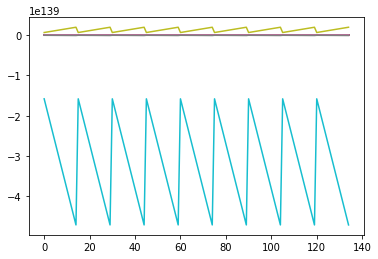

In [151]:
rate = 0.001
x_train = np.array(dfRentalCnt)
y_train = np.array(dfDuration['sum'])
x_test = np.array(dfTest)


a = np.random.normal()
b = np.random.normal()
c = np.random.normal()

def h(x):
    return a*x[0]+b*x[1]+c

for i in range(100):
    sum_a=0
    sum_b=0
    sum_c=0
    for x, y in zip(x_train, y_train):
            sum_a = sum_a + rate*(y-h(x))*x[0]
            sum_b = sum_b + rate*(y-h(x))*x[1]
            sum_c = sum_c + rate*(y-h(x))
    a = a + sum_a
    b = b + sum_b
    c = c + sum_c
    plt.plot([h(xi) for xi in x_test])

print(a)
print(b)
print(c)

result=[h(xi) for xi in x_train]
print(result)
 
result=[h(xi) for xi in x_test]
print(result)

plt.show()